In [6]:
import numpy as np
import pandas as pd
import os
import graphviz

import sklearn
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
basedir = os.getcwd()
datadir = basedir + '/Data'

print(basedir)
print(datadir)

C:\Users\Rental\Documents\AI4ALL Project
C:\Users\Rental\Documents\AI4ALL Project/Data


In [8]:
features = pd.read_csv(datadir + '/features_processed.csv', index_col = 0)
labels = pd.read_csv(datadir + '/labels_processed.csv', index_col = 0)


In [9]:
labels

,SubjectID,#SampleID,BodySite,Preterm
1,10005,1000501278,Vaginal_Swab,0
6,10003,1000301298,Vaginal_Swab,0
7,10003,1000301308,Vaginal_Swab,0
8,10003,1000301318,Vaginal_Swab,0
9,10004,1000401368,Vaginal_Swab,0
...,...,...,...,...
4396,10046,1004604448.rs,Tooth_Gum,0
4397,10101,1010104488.rs,Tooth_Gum,1
4398,10024,1002402218.ca2.rs,Stool,0
4399,10023,1002302248.bn1.rs,Stool,0


In [10]:
features

,SubjectID,#SampleID,BodySite,History_of_preterm_delivery,GestWeekdel,PPROM,Hypertensive Disorder,Preeclampsia,Number_of_babies,Mean_OTU,unique_OTU,shannon_div,standard_dev,Preterm
1,10005,1000501278,Vaginal_Swab,0.0,40.0,0.0,1.0,0.0,1.0,50.550000,16,0.021199,25.550941,0
6,10003,1000301298,Vaginal_Swab,1.0,38.0,0.0,1.0,0.0,1.0,59.980769,17,0.037150,51.114763,0
7,10003,1000301308,Vaginal_Swab,1.0,38.0,0.0,1.0,0.0,1.0,59.980769,12,0.020697,24.790647,0
8,10003,1000301318,Vaginal_Swab,1.0,38.0,0.0,1.0,0.0,1.0,59.980769,23,0.038345,50.092526,0
9,10004,1000401368,Vaginal_Swab,0.0,40.0,0.0,0.0,0.0,1.0,68.370370,30,0.030563,30.201347,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,10046,1004604448.rs,Tooth_Gum,0.0,40.0,0.0,0.0,0.0,1.0,83.692810,97,0.088239,32.568406,0
4397,10101,1010104488.rs,Tooth_Gum,1.0,37.0,1.0,0.0,0.0,1.0,89.315534,81,0.063389,19.547182,1
4398,10024,1002402218.ca2.rs,Stool,0.0,38.0,0.0,3.0,0.0,1.0,67.545455,81,0.081020,30.734053,0
4399,10023,1002302248.bn1.rs,Stool,0.0,40.0,0.0,0.0,0.0,1.0,81.754839,178,0.093405,17.526890,0


<AxesSubplot:xlabel='Preterm', ylabel='shannon_div'>

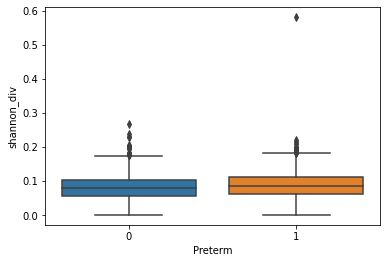

In [11]:
sns.boxplot(x='Preterm', y='shannon_div', data=features)

In [20]:
from sklearn.tree import DecisionTreeClassifier

y = labels['Preterm']
X = features[['shannon_div']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
dectree.fit(X_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(X_test)

dectree = DecisionTreeClassifier(random_state=0,max_depth = 4)


In [13]:
X

,shannon_div
1,0.021199
6,0.037150
7,0.020697
8,0.038345
9,0.030563
...,...
4396,0.088239
4397,0.063389
4398,0.081020
4399,0.093405


In [29]:
#print decision tree
#dot_data = tree.export_graphviz(dectree, out_file=None, impurity=False) 
#graph = graphviz.Source(dot_data) 
#graph

dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=X.columns,class_names=['shannon_div','Preterm'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/Diversitytree.txt","w+")
f.write(dot_data)
f.close()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

Accuracy:  62.93436293436293


In [16]:
metrics.plot_roc_curve(dectree, X_test, y_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [17]:
basedir = os.getcwd()

In [18]:
dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=X.columns,class_names=['Not Preterm','Preterm'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/diversity.txt","w+")
f.write(dot_data)
f.close()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Import visualization libraries
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
h

In [19]:
# Create image
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0', '1', '2', '3', '4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf('drive/MyDrive/pregnancy_prediction.pdf')
Image(graph.create_png())


NameError: name 'StringIO' is not defined

In [6]:
import skbio.diversity.alpha as alpha
df['Shannon_entropy']=data.apply(alpha.shannon, axis=1)#shannon entropy

ModuleNotFoundError: No module named 'skbio'

In [1]:
import skbio.diversity.alpha as alpha
df['Shannon_entropy']=data.apply(alpha.shannon, axis=1)# shannon entropy


ModuleNotFoundError: No module named 'skbio'

In [ ]:
import skbio.diversity.alpha as alpha
df['Shannon_entropy']=data.apply(alpha.shannon, axis=1)# shannon entropy


In [ ]:
from sklearn.tree import DecisionTreeClassifier

y = labels['Preterm']
X = features[['shannon_div']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
dectree.fit(X_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(X_test)